In [1]:
#pip install xgboost

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 25/10-10  Balder Triassic

In [14]:
blind = training_data[training_data['WELL'] == '25/10-10  Balder Triassic']
training_data = training_data[training_data['WELL'] != '25/10-10  Balder Triassic']

In [15]:
blind['Facies'].unique()

array([6, 5, 7, 4])

In [16]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [17]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,7.120582,2.068850,0.441895,2.445272,0.444403,2727.514574
std,352.014203,229.875939,42.531395,3.544087,7.905972,0.455715,0.151514,0.456893,806.463487
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,947.532465,428.624351,57.623103,5.000000,0.206353,0.152812,2.360203,0.154191,2068.077698
50%,1122.756091,580.014596,80.286850,6.000000,0.282810,0.397062,2.474200,0.406591,2637.434326
75%,1250.394469,678.348782,105.959152,10.000000,0.354700,0.678576,2.558000,0.691040,3224.223145
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [19]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

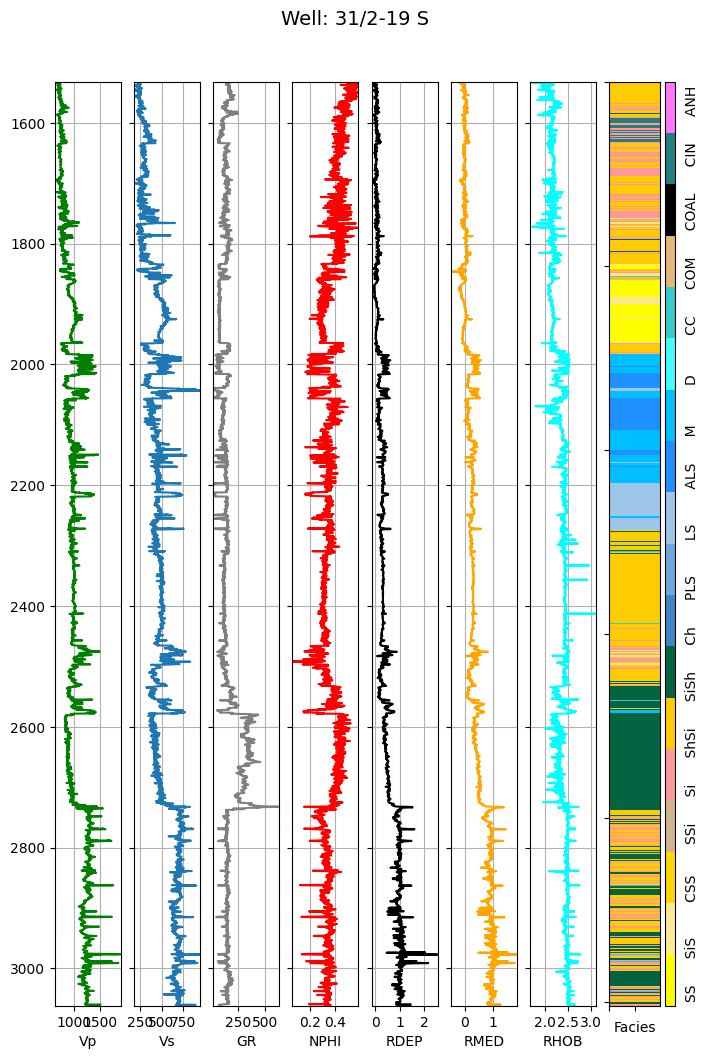

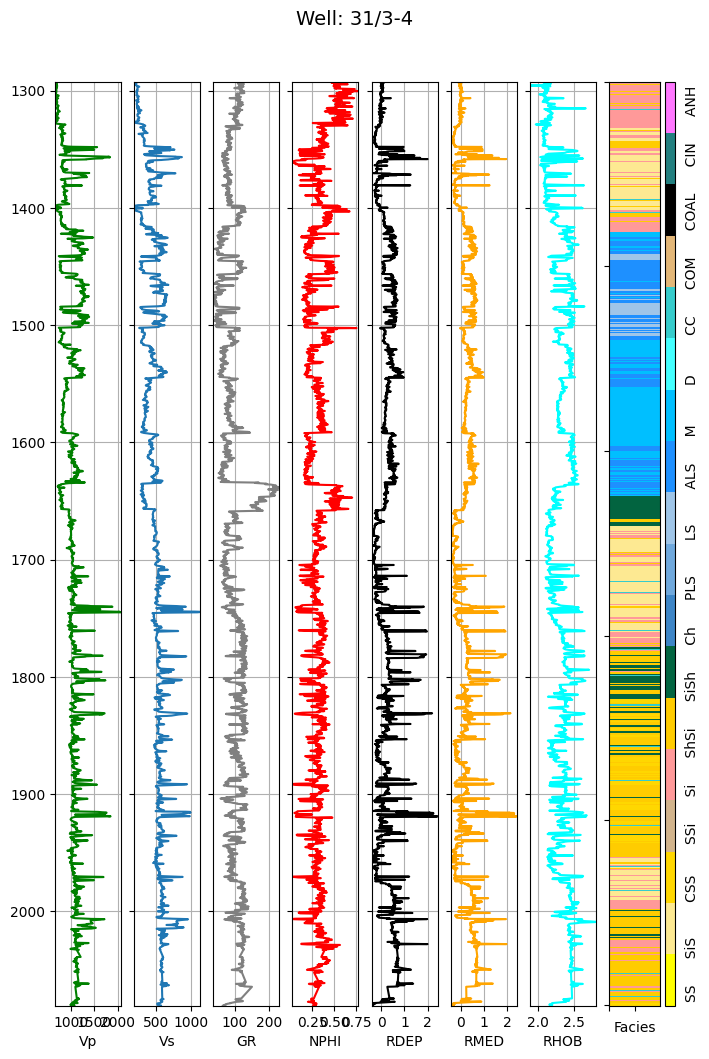

In [20]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/3-4'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      5783
Si      31375
ShSi    36398
SiSh    25752
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

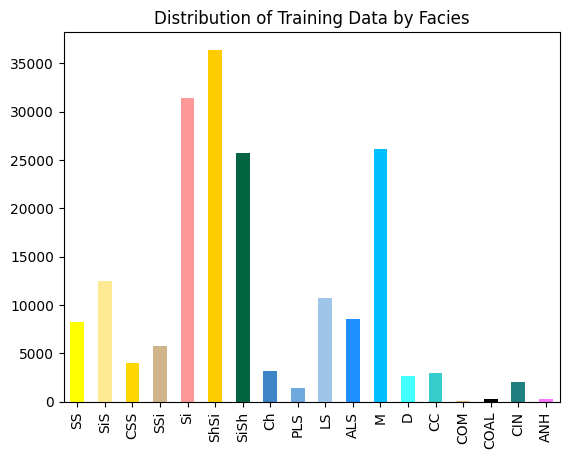

In [21]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [22]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['WELL', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,Vp,Vs,GR,NPHI,RDEP,RHOB,RMED
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,2.068850,0.441895,2.445272,0.444403
std,352.014203,229.875939,42.531395,7.905972,0.455715,0.151514,0.456893
min,261.159283,97.222720,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,947.532465,428.624351,57.623103,0.206353,0.152812,2.360203,0.154191
50%,1122.756091,580.014596,80.286850,0.282810,0.397062,2.474200,0.406591
75%,1250.394469,678.348782,105.959152,0.354700,0.678576,2.558000,0.691040
max,5519.963395,2875.440293,1163.366455,61.007858,4.466433,3.217700,4.000000


In [23]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [24]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['Vp','Vs','GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,-0.688345,-0.788716,0.289356,-0.212150,-1.296204,0.230527,-1.359457
1,-0.692938,-0.815353,0.573060,-0.212214,-1.281139,0.375728,-1.354113
2,-0.701480,-0.860219,0.978768,-0.210101,-1.271298,0.183666,-1.307847
3,-0.722160,-0.878663,1.524196,-0.210114,-1.273259,0.237788,-1.271291
4,-0.781637,-0.916510,1.864792,-0.207799,-1.303617,0.169147,-1.343036
...,...,...,...,...,...,...,...
182253,-0.372793,1.010503,-1.269007,-0.240623,-1.147226,-0.732837,-1.198160
182254,-0.376534,1.010603,-1.221695,-0.239385,-1.115348,-0.523544,-1.161360
182255,-0.377719,1.010587,-1.123219,-0.238524,-1.068150,-0.436094,-1.109064
182256,-0.358447,1.010856,-1.007339,-0.239456,-1.049407,-0.560478,-1.084689


In [25]:
scaled_features

array([[-0.68834528, -0.78871555,  0.28935601, ..., -1.2962045 ,
         0.23052712, -1.35945719],
       [-0.69293795, -0.8153529 ,  0.57306014, ..., -1.28113852,
         0.37572753, -1.35411271],
       [-0.70148   , -0.86021884,  0.9787685 , ..., -1.27129819,
         0.18366595, -1.30784656],
       ...,
       [-0.37771949,  1.01058666, -1.12321901, ..., -1.06815004,
        -0.43609434, -1.10906385],
       [-0.35844724,  1.01085552, -1.00733911, ..., -1.04940668,
        -0.56047787, -1.08468923],
       [-0.2643566 ,  1.01279157, -1.10981613, ..., -1.06667553,
        -0.74077695, -1.09524098]])

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=123)

In [27]:
x_train

array([[-0.06154646, -0.18681326,  0.83134999, ..., -0.71226943,
         0.53545049, -0.62757727],
       [ 0.19494804, -1.56190465,  0.10043147, ...,  0.27797613,
         0.99803229,  0.54896747],
       [ 0.24228843,  0.2814774 , -0.40476278, ..., -0.1478677 ,
        -0.0611955 , -0.14913032],
       ...,
       [-0.26236742, -0.15071751, -0.83169198, ..., -0.56302878,
        -0.79051306, -0.49654331],
       [ 1.07532144,  0.98479446, -1.73430342, ..., -0.14871537,
         0.88722717, -0.13634838],
       [-0.15916253, -0.16570974,  0.11077686, ..., -1.15622135,
        -1.45843115, -1.19204931]])

# Conventional ML - SVM Classification

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [29]:
clf_SVC = SVC(gamma='scale', C=1000, kernel='rbf')
clf_SVC.fit(x_train, y_train)

SVC(C=1000)

In [30]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred_SVC = clf_SVC.fit(x_train, y_train).predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred_SVC)

# compute and print accuracy score
print('Training Error is: {0:0.4f}'. format(clf_SVC.fit(x_train, y_train).score(x_train, y_train)))
print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_SVC)))

Training Error is: 0.7377
Testing Accuracy is: 0.7229


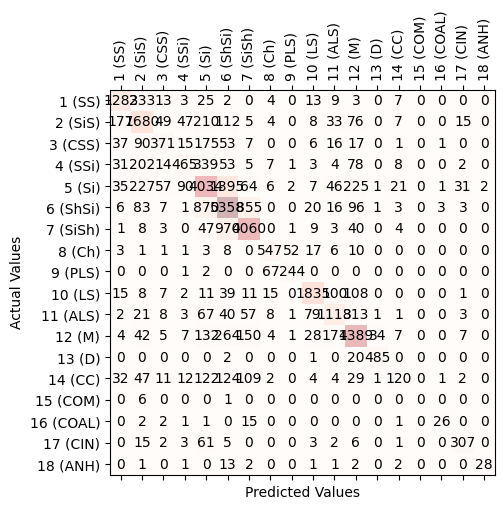

              precision    recall  f1-score   support

           1       0.79      0.80      0.80      1595
           2       0.63      0.69      0.66      2423
           3       0.67      0.47      0.55       789
           4       0.71      0.38      0.50      1212
           5       0.66      0.65      0.65      6244
           6       0.63      0.73      0.68      7322
           7       0.76      0.79      0.77      5146
           8       0.82      0.84      0.83       649
           9       0.81      0.78      0.79       314
          10       0.90      0.85      0.88      2152
          11       0.73      0.65      0.69      1722
          12       0.81      0.84      0.82      5245
          13       0.93      0.95      0.94       508
          14       0.66      0.19      0.30       620
          15       0.00      0.00      0.00         7
          16       0.81      0.54      0.65        48
          17       0.83      0.76      0.79       405
          18       0.93    

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_SVC))

# Conventional ML - RF Classification

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RFC = RandomForestClassifier(n_estimators=1000, random_state=0)
RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [34]:
y_pred_RFC = RFC.predict(x_test)
y_pred_RFC

array([ 7, 12,  5, ...,  1,  2,  9])

In [35]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred_RFC = RFC.fit(x_train, y_train).predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred_RFC)

from sklearn.metrics import accuracy_score
# compute and print accuracy score
print('Training Accuracy is: {0:0.4f}'. format(RFC.fit(x_train, y_train).score(x_train, y_train)))
print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_RFC)))

Training Accuracy is: 1.0000
Testing Accuracy is: 0.8212


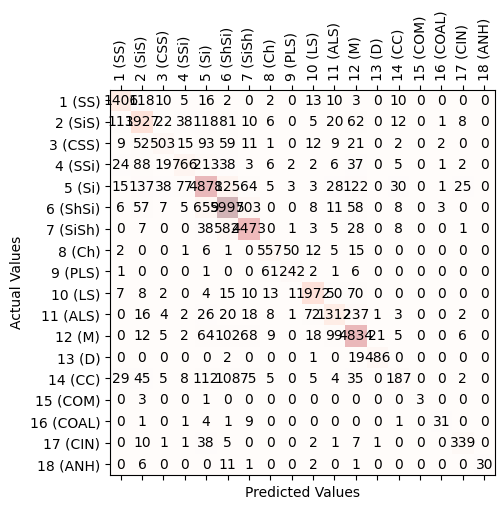

              precision    recall  f1-score   support

           1       0.87      0.88      0.88      1595
           2       0.77      0.80      0.78      2423
           3       0.82      0.64      0.72       789
           4       0.83      0.63      0.72      1212
           5       0.78      0.78      0.78      6244
           6       0.76      0.82      0.79      7322
           7       0.85      0.87      0.86      5146
           8       0.83      0.86      0.84       649
           9       0.81      0.77      0.79       314
          10       0.92      0.92      0.92      2152
          11       0.84      0.76      0.80      1722
          12       0.87      0.92      0.90      5245
          13       0.95      0.96      0.96       508
          14       0.69      0.30      0.42       620
          15       1.00      0.43      0.60         7
          16       0.79      0.65      0.71        48
          17       0.88      0.84      0.86       405
          18       1.00    

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_RFC))

# Conventional ML - XGBoost Classification

In [37]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
y_train_le = le.fit_transform(y_train) # Change class from [1, 2, 3, 4, ..., 9] to [0, 1, 2, 3, ..., 8]

In [38]:
y_train

array([12,  7, 12, ...,  3,  8,  5])

In [39]:
y_train_le

array([11,  6, 11, ...,  2,  7,  4], dtype=int64)

In [40]:
XGB = XGBClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 10)

In [41]:
XGB.fit(x_train, y_train_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [42]:
y_pred_XGB_ = XGB.predict(x_test)
y_pred_XGB = le.inverse_transform(y_pred_XGB_) # Change class back from [0, 1, 2, 3, ..., 8] to [1, 2, 3, 4, ..., 9]
y_pred_XGB

array([ 7, 12,  5, ...,  1,  2,  9])

In [43]:
from sklearn.metrics import accuracy_score
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(y_test, y_pred_XGB)

# compute and print accuracy score
# compute and print accuracy score
print('Training Accuracy is: {0:0.4f}'. format(XGB.fit(x_train, y_train_le).score(x_train, y_train_le)))
print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_XGB)))

Training Accuracy is: 0.8690
Testing Accuracy is: 0.7716


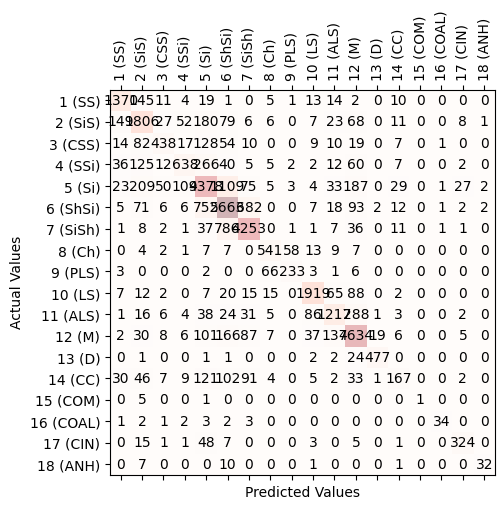

              precision    recall  f1-score   support

           1       0.83      0.86      0.85      1595
           2       0.70      0.75      0.72      2423
           3       0.76      0.56      0.64       789
           4       0.75      0.53      0.62      1212
           5       0.72      0.70      0.71      6244
           6       0.70      0.77      0.74      7322
           7       0.81      0.83      0.82      5146
           8       0.82      0.83      0.83       649
           9       0.78      0.74      0.76       314
          10       0.91      0.89      0.90      2152
          11       0.79      0.71      0.74      1722
          12       0.83      0.88      0.86      5245
          13       0.95      0.94      0.95       508
          14       0.63      0.27      0.38       620
          15       1.00      0.14      0.25         7
          16       0.89      0.71      0.79        48
          17       0.87      0.80      0.83       405
          18       0.86    

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_XGB))

## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [45]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
29906,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861
29907,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327
29908,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671
29909,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137
29910,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481
...,...,...,...,...,...,...,...,...,...,...
32362,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865
32363,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209
32364,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797
32365,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141


In [47]:
y_blind = blind['Facies'].values
well_features = blind.drop(['Facies', 'WELL', 'Depth'], axis=1)
x_blind = scaler.transform(well_features)

## SVC Prediction

In [48]:
y_pred_SVC = clf_SVC.predict(x_blind)
blind['Prediction_SVC'] = y_pred_SVC.astype(float)

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC
29906,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861,7.0
29907,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327,7.0
29908,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671,5.0
29909,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137,2.0
29910,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481,1.0
...,...,...,...,...,...,...,...,...,...,...,...
32362,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865,3.0
32363,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209,5.0
32364,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797,6.0
32365,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141,6.0


# RFC Prediction

In [50]:
y_pred_RFC = RFC.predict(x_blind)
blind['Prediction_RFC'] = y_pred_RFC.astype(float)

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC,Prediction_RFC
29906,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861,7.0,7.0
29907,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327,7.0,7.0
29908,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671,5.0,5.0
29909,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137,2.0,2.0
29910,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32362,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865,3.0,5.0
32363,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209,5.0,5.0
32364,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797,6.0,6.0
32365,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141,6.0,6.0


# XGBoost Prediction

In [52]:
y_pred_XGB_ = XGB.predict(x_blind)
y_pred_XGB = le.inverse_transform(y_pred_XGB_)
blind['Prediction_XGB'] = y_pred_XGB.astype(float)

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
y_pred_XGB

array([7, 7, 5, ..., 6, 6, 6])

In [54]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC,Prediction_RFC,Prediction_XGB
29906,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861,7.0,7.0,7.0
29907,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327,7.0,7.0,7.0
29908,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671,5.0,5.0,5.0
29909,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137,2.0,2.0,2.0
29910,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32362,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865,3.0,5.0,5.0
32363,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209,5.0,5.0,5.0
32364,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797,6.0,6.0,6.0
32365,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141,6.0,6.0,6.0


In [55]:
# A function to plot comparison between actual and predicted facies classes, along with its features (seven well logs)

def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=9, figsize=(9, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im1 = ax[7].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im2 = ax[8].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[8])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    ax[8].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([]); ax[6].set_xticklabels([])
    ax[7].set_xticklabels([]); ax[7].set_yticklabels([]); ax[8].set_xticklabels([]); ax[8].set_yticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

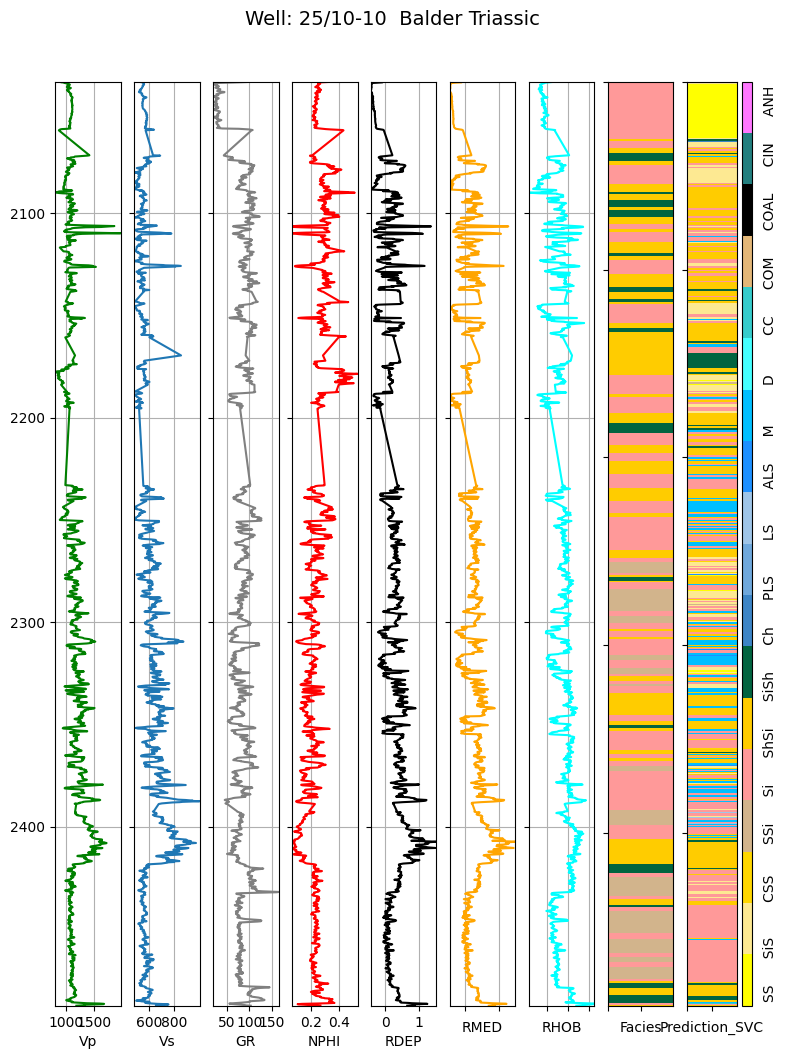

In [57]:
compare_facies_plot(blind, 'Prediction_SVC', facies_colors)

In [60]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_SVC'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_SVC'])))

Blind test accuracy score is: 0.3941


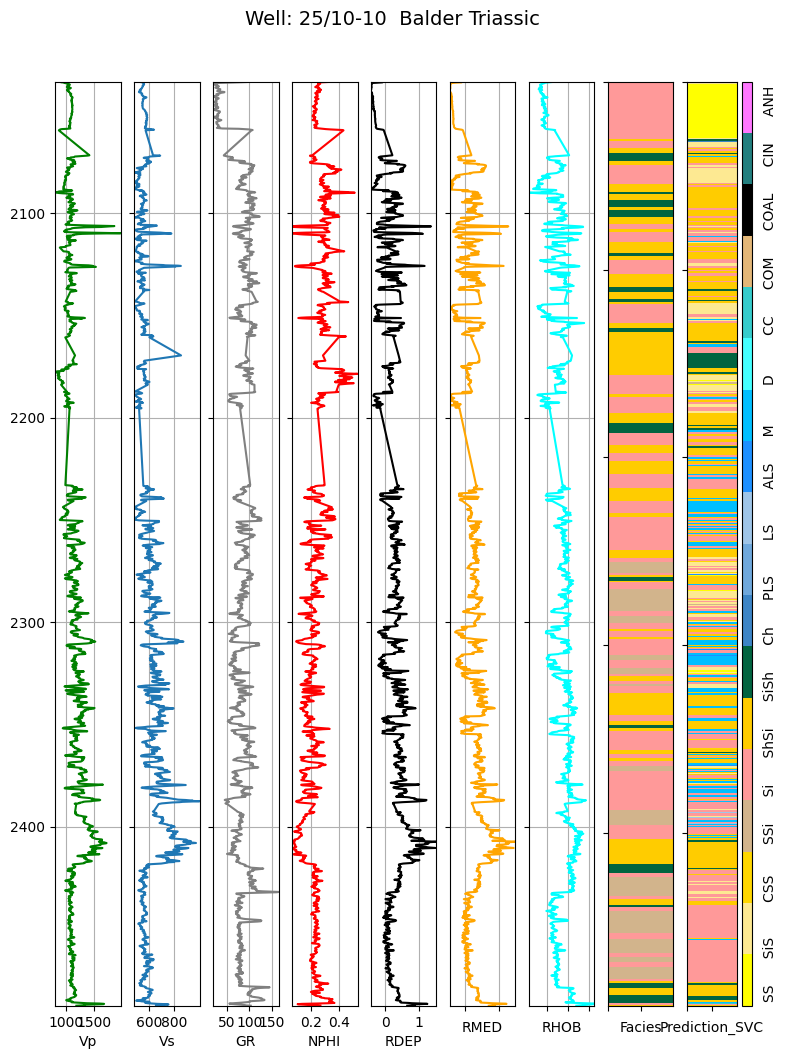

In [61]:
compare_facies_plot(blind, 'Prediction_SVC', facies_colors)

In [62]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_SVC'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_SVC'])))

Blind test accuracy score is: 0.3941


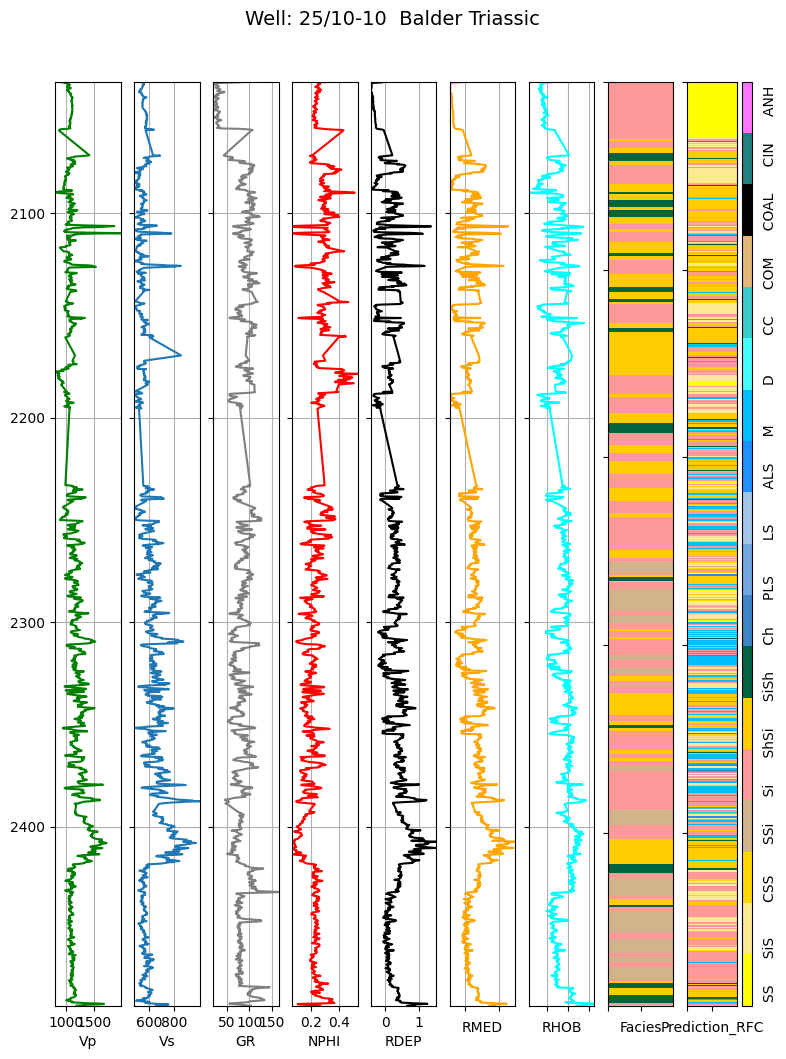

In [63]:
compare_facies_plot(blind, 'Prediction_RFC', facies_colors)

In [64]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_RFC'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_RFC'])))

Blind test accuracy score is: 0.3157


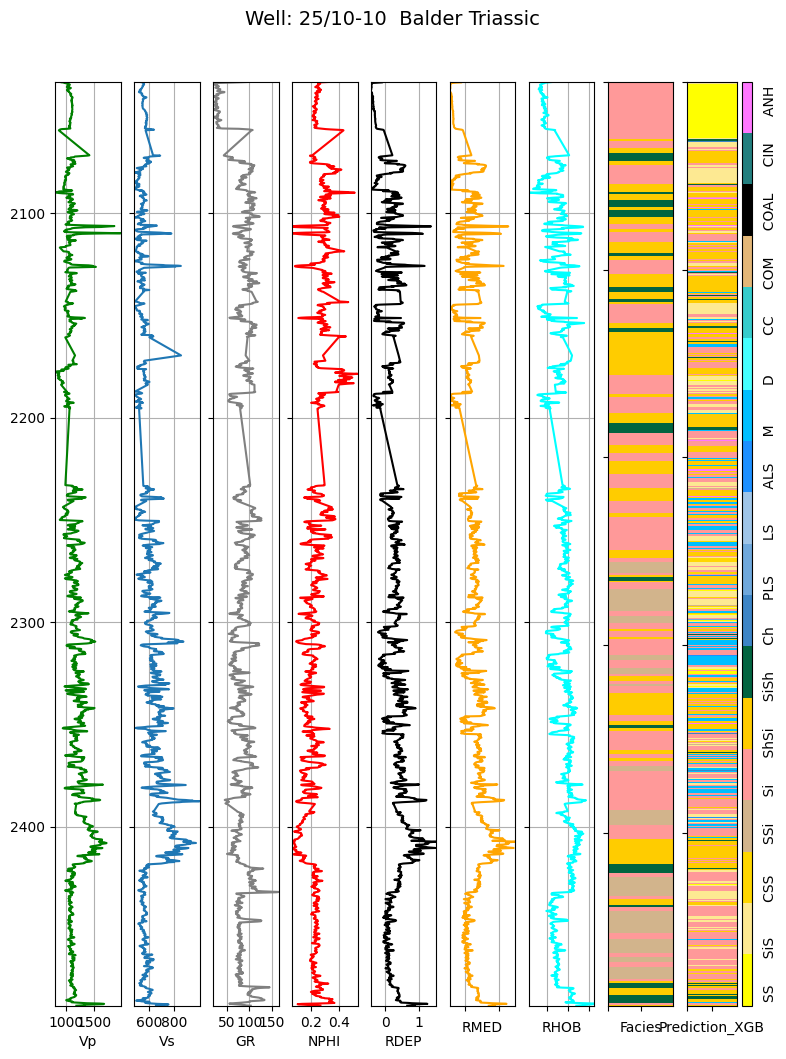

In [65]:
compare_facies_plot(blind, 'Prediction_XGB', facies_colors)

In [66]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_XGB'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_XGB'])))

Blind test accuracy score is: 0.3844


In [67]:
blind_data_save = blind
blind_data_save.to_csv('well25_CONV_facies.csv', index=False)